In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns


In [2]:
data =pd.read_csv("/content/housing.csv")

In [3]:
print(data.shape)

(20640, 10)


In [4]:
# Check for missing values
print(data.isnull().sum())


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [5]:
# Drop missing values (if any)
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
from sklearn.model_selection import train_test_split
x=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [9]:
train_data=x_train.join(y_train)

In [10]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
7283,-118.25,33.98,37.0,1503.0,392.0,1886.0,401.0,2.5637,<1H OCEAN,125000.0
4102,-118.39,34.14,19.0,5076.0,1034.0,2021.0,960.0,5.5683,<1H OCEAN,309200.0
19118,-122.65,38.23,52.0,1923.0,393.0,910.0,345.0,3.4500,<1H OCEAN,200600.0
12607,-121.49,38.50,30.0,1715.0,271.0,842.0,263.0,3.0313,INLAND,87900.0
8634,-118.41,33.88,34.0,540.0,107.0,213.0,104.0,6.3403,<1H OCEAN,500001.0
...,...,...,...,...,...,...,...,...,...,...
354,-122.17,37.76,40.0,1685.0,343.0,949.0,342.0,1.8426,NEAR BAY,94800.0
12952,-121.28,38.71,35.0,3095.0,594.0,1550.0,576.0,3.5750,INLAND,113500.0
9966,-122.40,38.46,33.0,2542.0,466.0,1099.0,420.0,4.6350,INLAND,248500.0
19040,-122.00,38.36,34.0,1502.0,282.0,860.0,297.0,3.3438,INLAND,135600.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

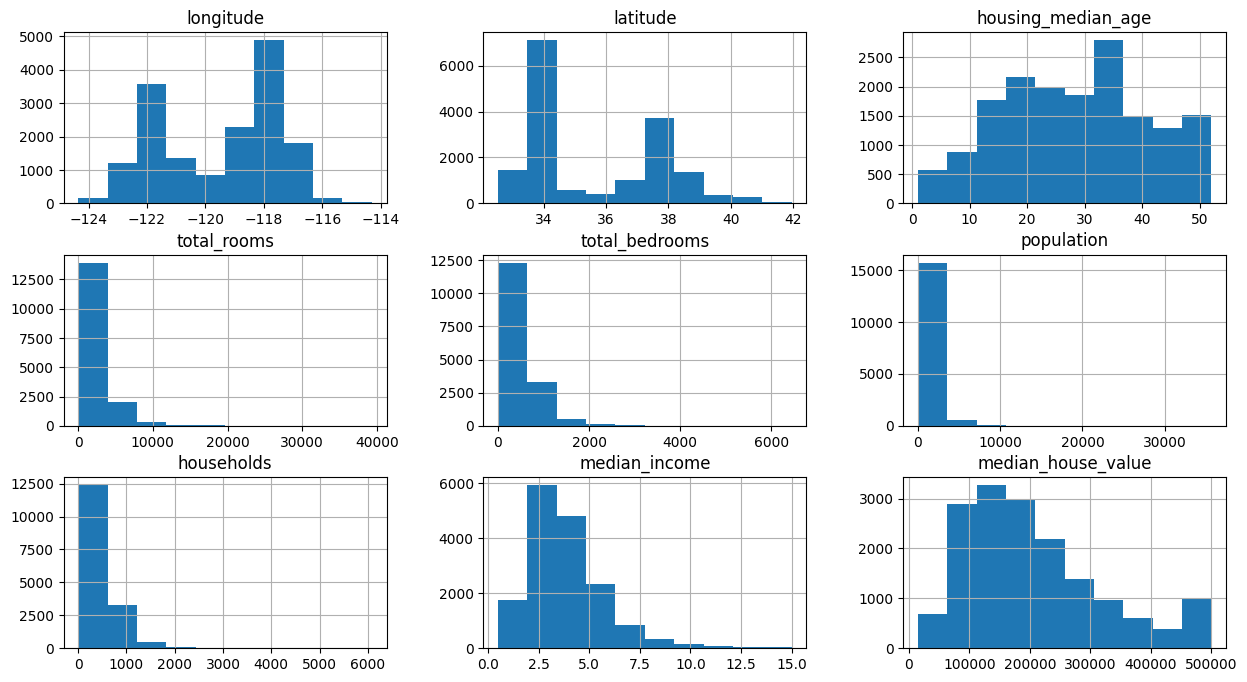

In [11]:
train_data.hist(figsize=(15,8))

In [12]:
train_data.select_dtypes(include=np.number).corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924795,-0.103817,0.045493,0.070045,0.099985,0.057057,-0.013049,-0.042849
latitude,-0.924795,1.000000,0.006994,-0.035542,-0.066302,-0.107721,-0.071034,-0.082467,-0.146501
housing_median_age,-0.103817,0.006994,1.000000,-0.360917,-0.324775,-0.294848,-0.306468,-0.117996,0.103247
total_rooms,0.045493,-0.035542,-0.360917,1.000000,0.933280,0.859521,0.921915,0.198406,0.130438
total_bedrooms,0.070045,-0.066302,-0.324775,0.933280,1.000000,0.878092,0.979715,-0.002909,0.048568
population,0.099985,-0.107721,-0.294848,0.859521,0.878092,1.000000,0.907442,0.009228,-0.026172
households,0.057057,-0.071034,-0.306468,0.921915,0.979715,0.907442,1.000000,0.017816,0.063207
median_income,-0.013049,-0.082467,-0.117996,0.198406,-0.002909,0.009228,0.017816,1.000000,0.689989
median_house_value,-0.042849,-0.146501,0.103247,0.130438,0.048568,-0.026172,0.063207,0.689989,1.000000


<Axes: >

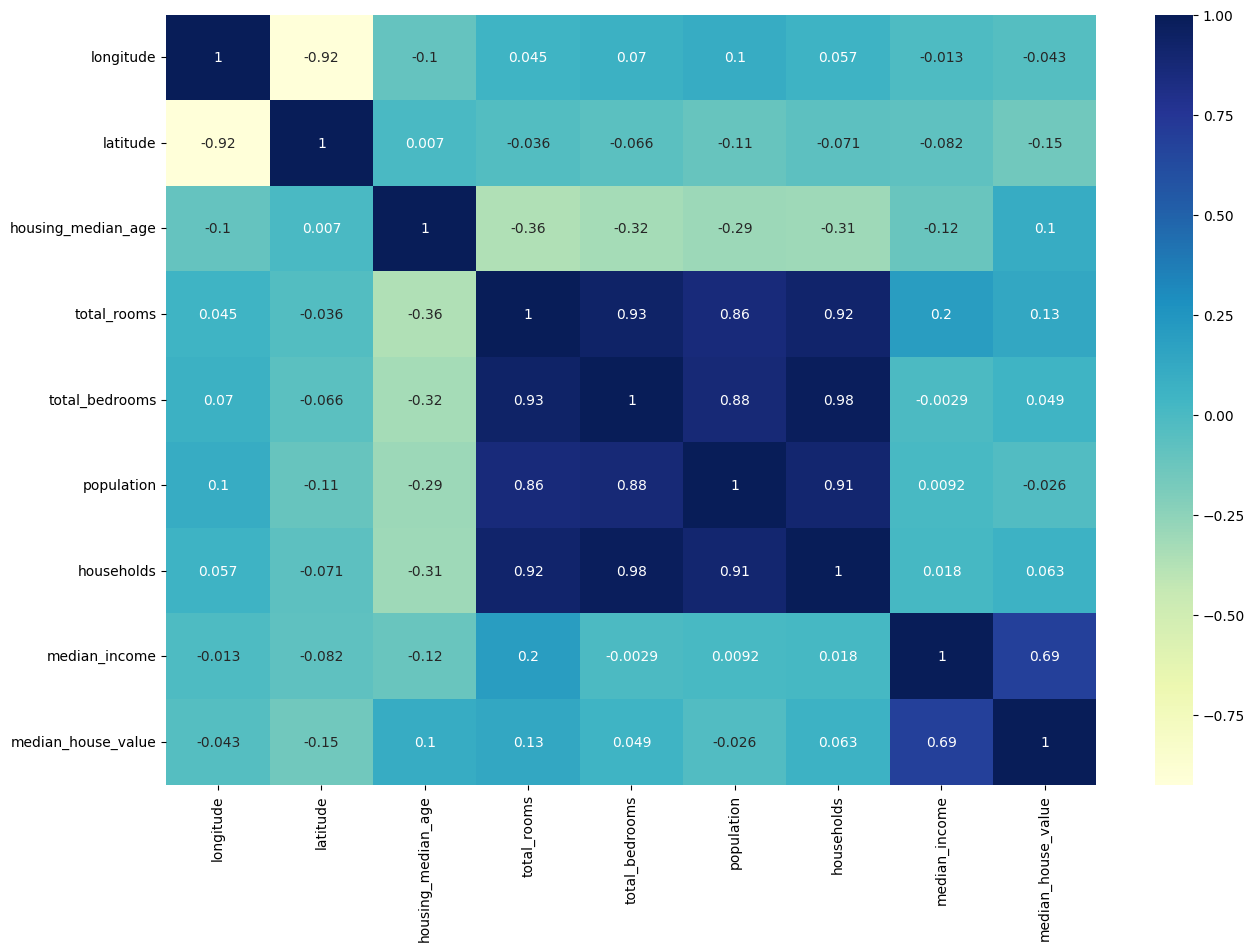

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data.select_dtypes(include=np.number).corr(),annot=True,cmap='YlGnBu')

In [14]:
train_data["total_rooms"]=np.log(train_data["total_rooms"]+1)
train_data["total_bedrooms"]=np.log(train_data["total_bedrooms"]+1)
train_data["population"]=np.log(train_data["population"]+1)
train_data["households"]=np.log(train_data["households"]+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

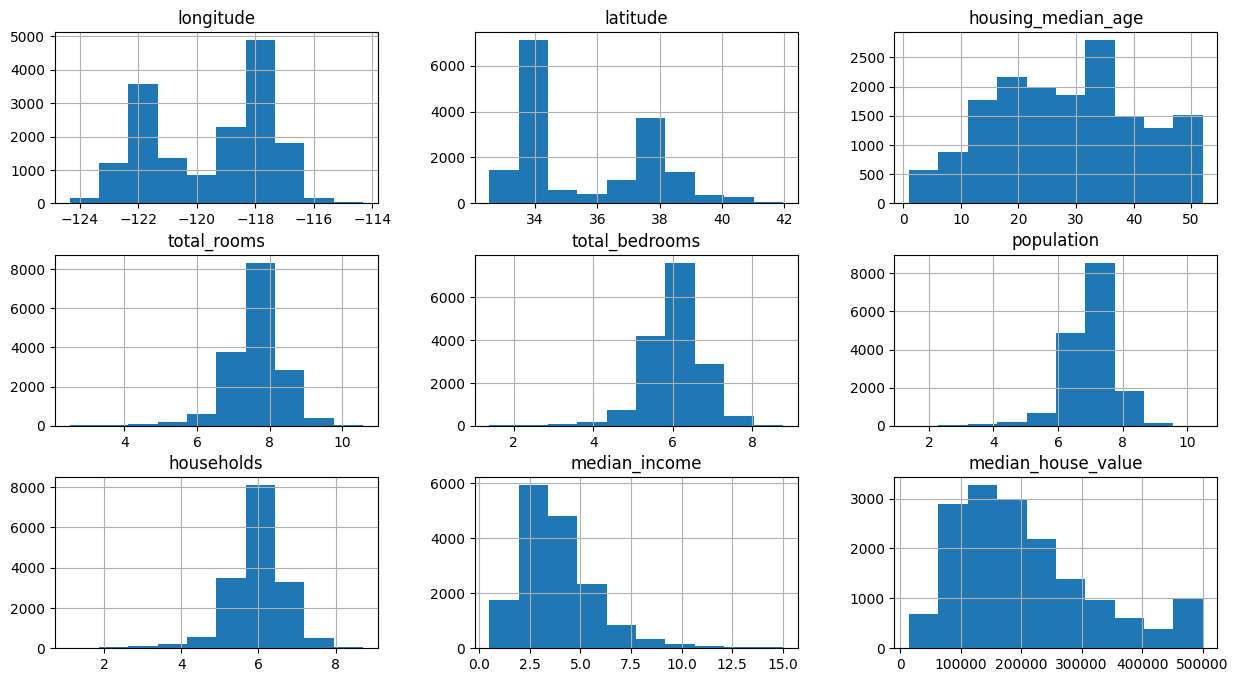

In [15]:
train_data.hist(figsize=(15,8))

In [16]:
pd.get_dummies(train_data['ocean_proximity'],dtype=int)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
7283,1,0,0,0,0
4102,1,0,0,0,0
19118,1,0,0,0,0
12607,0,1,0,0,0
8634,1,0,0,0,0
...,...,...,...,...,...
354,0,0,0,1,0
12952,0,1,0,0,0
9966,0,1,0,0,0
19040,0,1,0,0,0


In [17]:
train_data=train_data.join(pd.get_dummies(train_data['ocean_proximity'],dtype=int)).drop(['ocean_proximity'],axis=1)

In [18]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
7283,-118.25,33.98,37.0,7.315884,5.973810,7.542744,5.996452,2.5637,125000.0,1,0,0,0,0
4102,-118.39,34.14,19.0,8.532476,6.942157,7.611842,6.867974,5.5683,309200.0,1,0,0,0,0
19118,-122.65,38.23,52.0,7.562162,5.976351,6.814543,5.846439,3.4500,200600.0,1,0,0,0,0
12607,-121.49,38.50,30.0,7.447751,5.605802,6.736967,5.575949,3.0313,87900.0,0,1,0,0,0
8634,-118.41,33.88,34.0,6.293419,4.682131,5.365976,4.653960,6.3403,500001.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,-122.17,37.76,40.0,7.430114,5.840642,6.856462,5.837730,1.8426,94800.0,0,0,0,1,0
12952,-121.28,38.71,35.0,8.037866,6.388561,7.346655,6.357842,3.5750,113500.0,0,1,0,0,0
9966,-122.40,38.46,33.0,7.841100,6.146329,7.003065,6.042633,4.6350,248500.0,0,1,0,0,0
19040,-122.00,38.36,34.0,7.315218,5.645447,6.758095,5.697093,3.3438,135600.0,0,1,0,0,0


<Axes: >

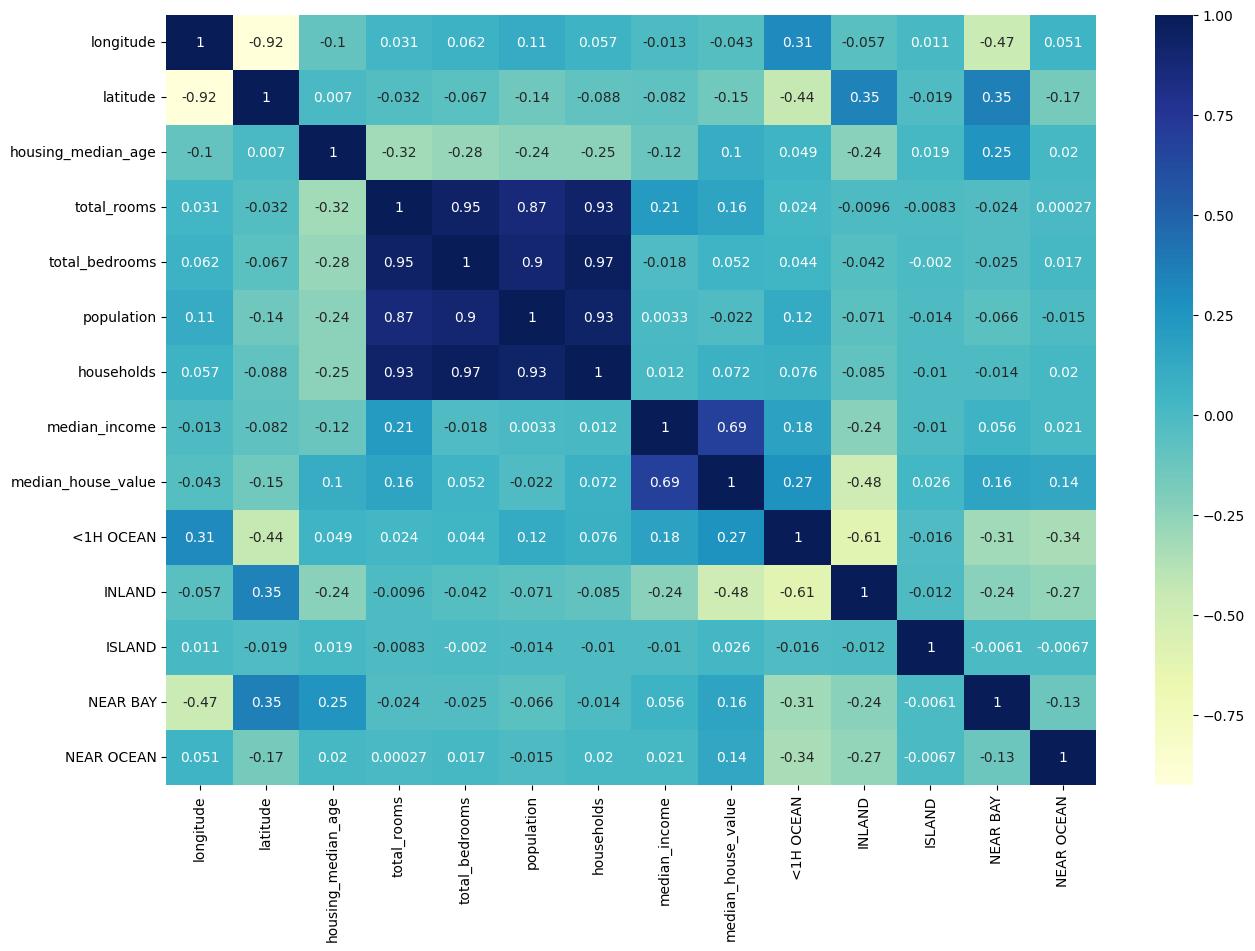

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(),annot=True,cmap='YlGnBu')

<Axes: xlabel='longitude', ylabel='latitude'>

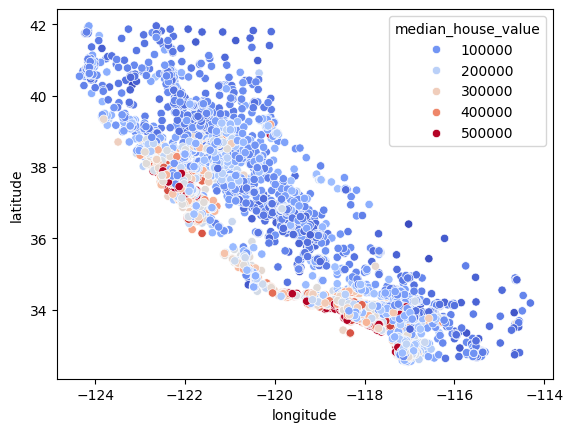

In [20]:
plt.figsize=(15,8)
sns.scatterplot(x='longitude',y='latitude',data=train_data,hue='median_house_value',palette='coolwarm')

In [21]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms']/train_data['households']

<Axes: >

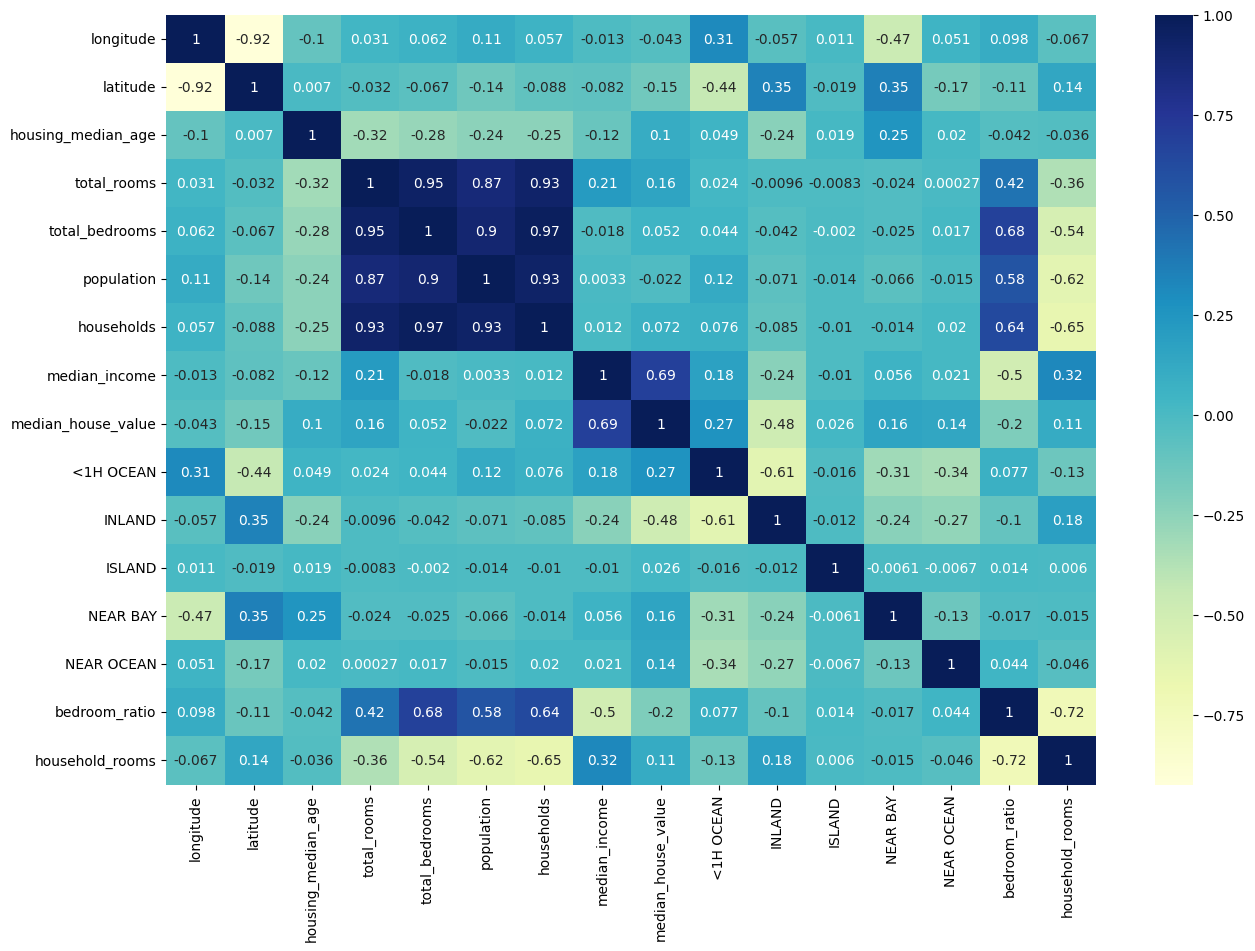

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(),annot=True,cmap='YlGnBu')

In [23]:
from sklearn.linear_model import LinearRegression
x_train,y_train=train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [28]:
test_data=x_test.join(y_test)

test_data["total_rooms"]=np.log(test_data["total_rooms"]+1)
test_data["total_bedrooms"]=np.log(test_data["total_bedrooms"]+1)
test_data["population"]=np.log(test_data["population"]+1)
test_data["households"]=np.log(test_data["households"]+1)

test_data=test_data.join(pd.get_dummies(test_data['ocean_proximity'],dtype=int)).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/test_data['households']

In [29]:
x_test,y_test=test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']


In [35]:
train_feature_cols = x_train.columns
x_test_aligned = x_test.reindex(columns=train_feature_cols, fill_value=0)

reg.score(x_test_aligned, y_test)

0.6606280831692268

In [36]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(x_train,y_train)

RandomForestRegressor()

In [38]:
train_feature_cols = x_train.columns
x_test_aligned = x_test.reindex(columns=train_feature_cols, fill_value=0)

forest.score(x_test_aligned, y_test)

0.8225642516313066